In [1]:
#the dataset can be found from
#https://www.kaggle.com/datasets/nanditapore/credit-risk-analysis
#the dataset is about loan applicant data for credit risk analysis
#Column Descriptions:
#    ID: Unique identifier for each loan applicant.
#    Age: Age of the loan applicant.
#    Income: Income of the loan applicant.
#    Home: Home ownership status (Own, Mortgage, Rent).
#    Emp_Length: Employment length in years.
#    Intent: Purpose of the loan (e.g., education, home improvement).
#    Amount: Loan amount applied for.
#    Rate: Interest rate on the loan.
#    Status: Loan approval status (Fully Paid, Charged Off, Current).
#    Percent_Income: Loan amount as a percentage of income.
#    Default: Whether the applicant has defaulted on a loan previously (Yes, No).
#    Cred_Length: Length of the applicant's credit history.
#we will build the prediction models 


In [3]:
import pandas as pd

In [4]:
#load the dataset into dataframe df
df = pd.read_csv('data/credit_risk.csv')

In [5]:
#show content of dataframe
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [6]:
df.shape

(32581, 12)

In [7]:
#show the dataset per each column of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [8]:
#find how how many null value in the dataframe
df.isnull().sum(axis = 0)

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [9]:
#drop those row with null
df = df.dropna()

In [10]:
#confirm no more null
df.isnull().sum(axis = 0)

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

In [11]:
#Exploratory Data Analysis
#understand column Home
print('-------job--------')
print('HOME')
print(df['Home'].unique())  
print(df['Home'].value_counts())

-------job--------
HOME
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
RENT        14551
MORTGAGE    11801
OWN          2192
OTHER          94
Name: Home, dtype: int64


<AxesSubplot:xlabel='Age', ylabel='Default'>

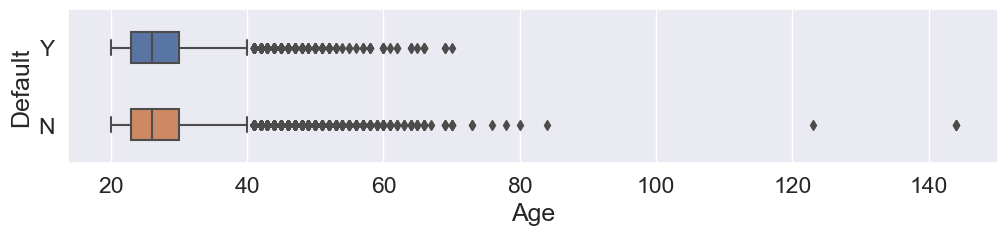

In [15]:
#use boxplot to show the distribution of feature Age and try to understand the correlation with Default
import seaborn as sns
width = 12
height = 2
sns.set(rc = {'figure.figsize':(width,height)})
sns.set(font_scale=1.5)
sns.boxplot(data=df, x="Age", y='Default', width=0.4)

<AxesSubplot:xlabel='Income', ylabel='Default'>

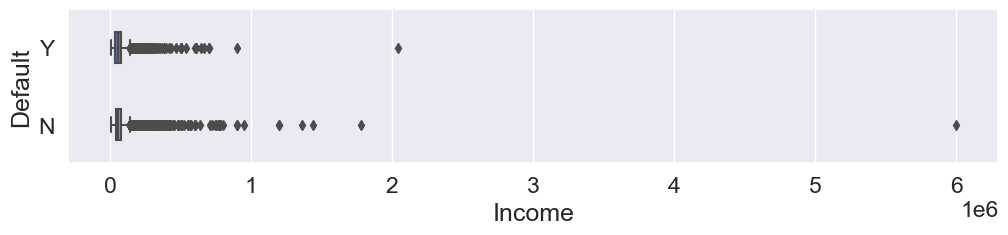

In [16]:
#use boxplot to show the distribution of feature Income and try to understand the correlation with Default
width = 12
height = 2
sns.set(rc = {'figure.figsize':(width,height)})
sns.set(font_scale=1.5)
sns.boxplot(data=df, x="Income", y='Default', width=0.4)

<AxesSubplot:xlabel='Emp_length', ylabel='Default'>

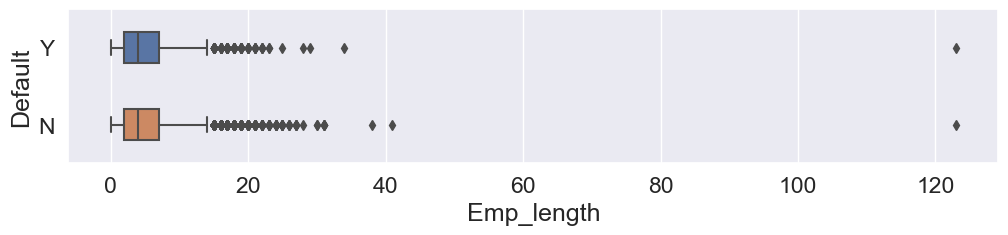

In [17]:
#use boxplot to show the distribution of feature Emp_length and try to understand the correlation with Default
width = 12
height = 2
sns.set(rc = {'figure.figsize':(width,height)})
sns.set(font_scale=1.5)
sns.boxplot(data=df, x="Emp_length", y='Default', width=0.4)

<AxesSubplot:xlabel='Amount', ylabel='Default'>

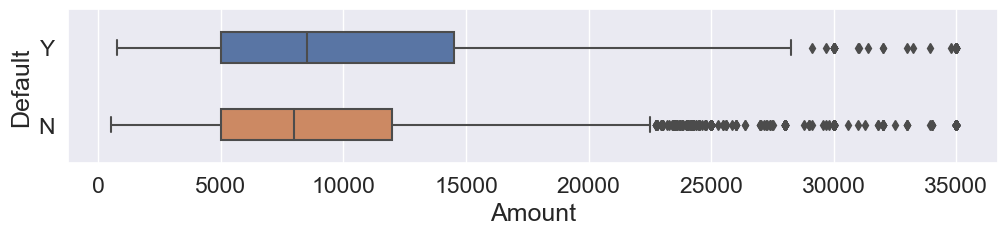

In [18]:
#use boxplot to show the distribution of feature Amount and try to understand the correlation with Default
width = 12
height = 2
sns.set(rc = {'figure.figsize':(width,height)})
sns.set(font_scale=1.5)
sns.boxplot(data=df, x="Amount", y='Default', width=0.4)

<AxesSubplot:xlabel='Rate', ylabel='Default'>

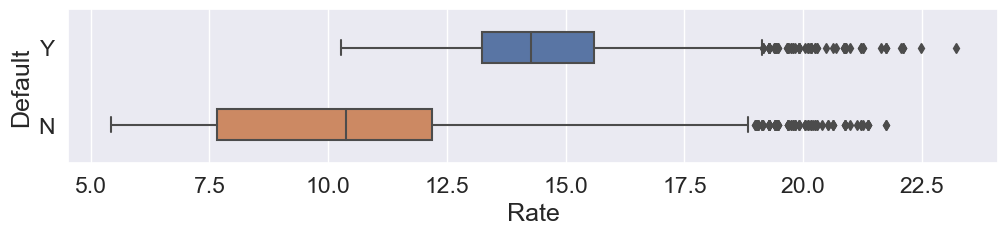

In [19]:
#use boxplot to show the distribution of feature Rate and try to understand the correlation with Default
width = 12
height = 2
sns.set(rc = {'figure.figsize':(width,height)})
sns.set(font_scale=1.5)
sns.boxplot(data=df, x="Rate", y='Default', width=0.4)

<AxesSubplot:xlabel='Percent_income', ylabel='Default'>

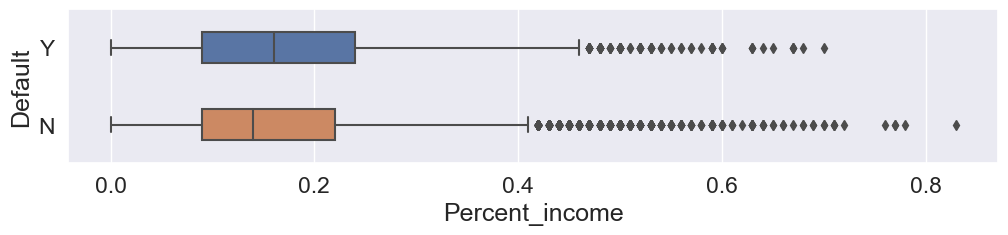

In [20]:
#use boxplot to show the distribution of feature Percent_income and try to understand the correlation with Default
width = 12
height = 2
sns.set(rc = {'figure.figsize':(width,height)})
sns.set(font_scale=1.5)
sns.boxplot(data=df, x="Percent_income", y='Default', width=0.4)

<AxesSubplot:xlabel='Cred_length', ylabel='Default'>

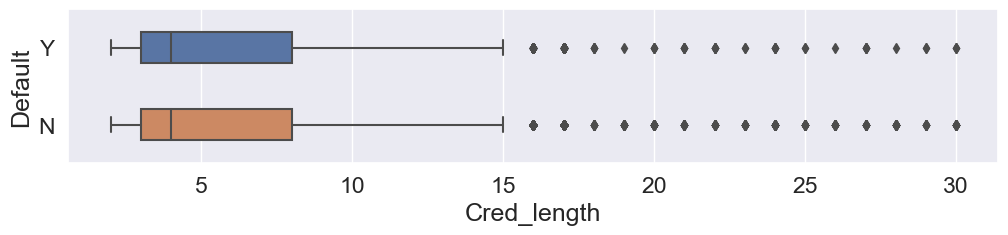

In [21]:
#use boxplot to show the distribution of feature Cred_length and try to understand the correlation with Default
width = 12
height = 2
sns.set(rc = {'figure.figsize':(width,height)})
sns.set(font_scale=1.5)
sns.boxplot(data=df, x="Cred_length", y='Default', width=0.4)

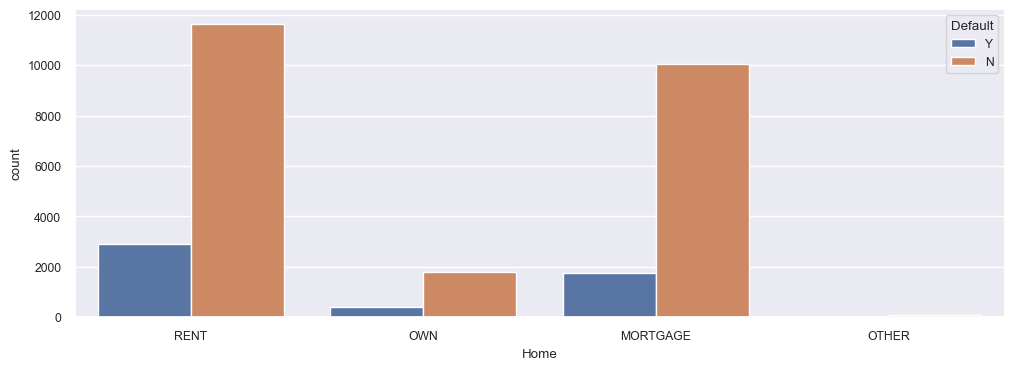

In [22]:
#use countplot to show the distribution of Home and the correlation with default
import seaborn as sns
import matplotlib.pyplot as plt
width = 12
height = 4
sns.set(rc = {'figure.figsize':(width,height)})
sns.set(font_scale=0.8)
sns.countplot(x ='Home', hue = "Default", data = df)
plt.show()

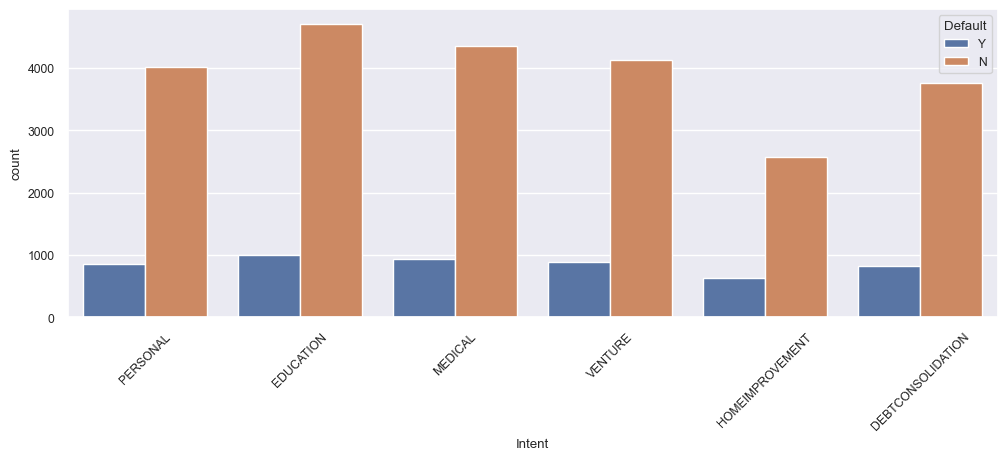

In [23]:
#use countplot to show the distribution of feature Intent and try to understand the correlation with Default
import seaborn as sns
import matplotlib.pyplot as plt
width = 12
height = 4
sns.set(rc = {'figure.figsize':(width,height)})
sns.set(font_scale=0.8)
chart = sns.countplot(x ='Intent', hue = "Default", data = df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

([<matplotlib.patches.Wedge at 0x2d75a64f250>,
 [Text(-0.9320975748993772, 0.5841182336365646, 'N'),
  Text(0.9320975748993774, -0.5841182336365642, 'Y')],
 [Text(-0.5084168590360238, 0.31860994561994427, '82.2%\n23535'),
  Text(0.508416859036024, -0.3186099456199441, '17.8%\n5103')])

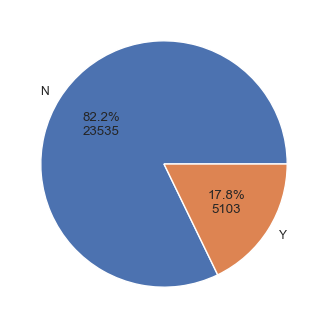

In [26]:
#use pie chart to understand the distribution of Default
import matplotlib.pyplot as plt
total = df['Default'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)
plt.pie(df['Default'].value_counts().values, labels=df['Default'].value_counts().index, autopct=fmt)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'Id'),
  Text(1.5, 0, 'Age'),
  Text(2.5, 0, 'Income'),
  Text(3.5, 0, 'Emp_length'),
  Text(4.5, 0, 'Amount'),
  Text(5.5, 0, 'Rate'),
  Text(6.5, 0, 'Status'),
  Text(7.5, 0, 'Percent_income'),
  Text(8.5, 0, 'Cred_length')])

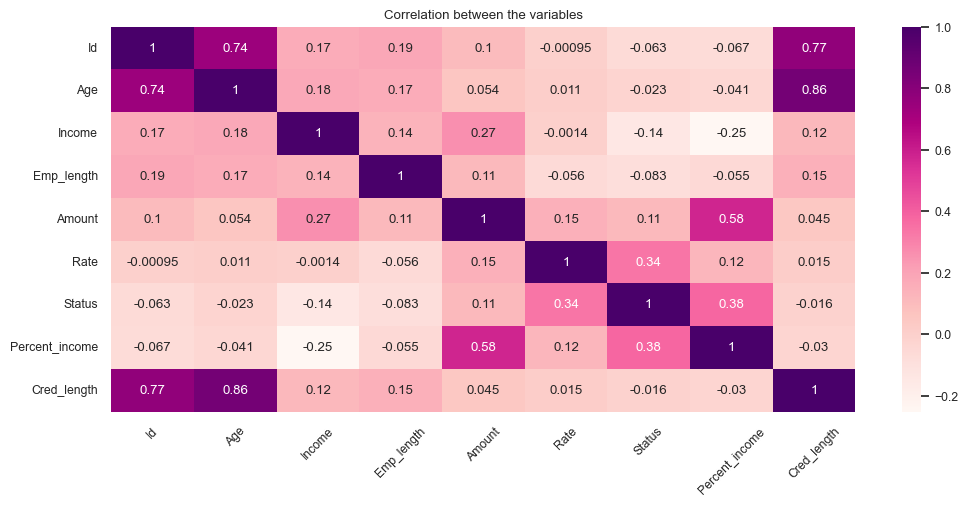

In [27]:
#We visualize the correlation between different features present in our data set.
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,5))
gender_correlation=df.corr()
sns.heatmap(gender_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

<AxesSubplot:xlabel='Cred_length', ylabel='Age'>

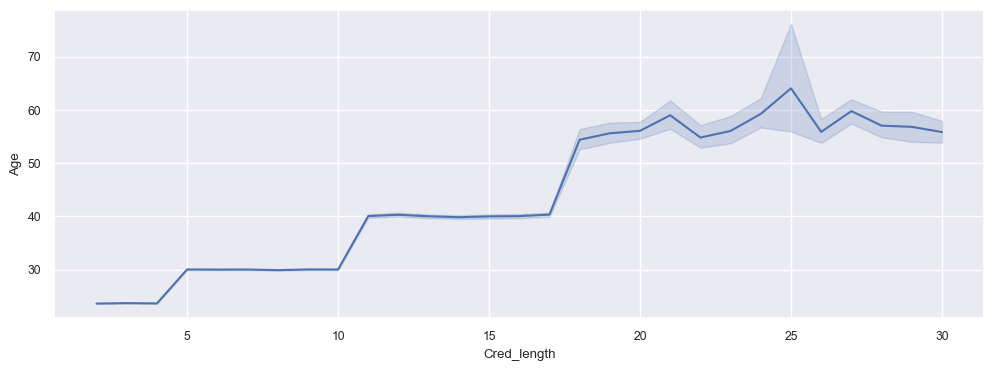

In [28]:
#from above heatmap, we find a strong correlation between Age and Cred_length, 
#we use line chart to produce below plot, we can see 
sns.lineplot(data=df, x="Cred_length", y="Age")

In [29]:
print('-------location--------')
print('Intent')
print(df['Intent'].unique())  
print(df.Intent.value_counts())

-------location--------
Intent
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
EDUCATION            5704
MEDICAL              5293
VENTURE              5001
PERSONAL             4877
DEBTCONSOLIDATION    4565
HOMEIMPROVEMENT      3198
Name: Intent, dtype: int64


<AxesSubplot:xlabel='Age', ylabel='Income'>

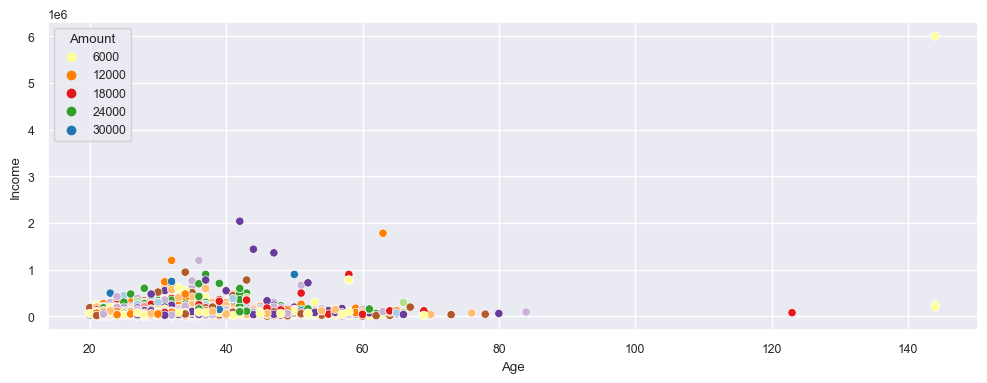

In [31]:
sns.scatterplot(
    data=df, 
    x='Age', 
    y='Income', 
    hue='Amount',
  
    palette='Paired_r'
    )


In [32]:
df = df.drop('Id', axis=1)

In [33]:
df.head(3)

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3


In [34]:
df2 = df
X1a = df2[['Age','Income','Home','Emp_length','Intent','Amount','Rate','Status','Percent_income','Cred_length']]
y1a = df2['Default']
X1a.columns

Index(['Age', 'Income', 'Home', 'Emp_length', 'Intent', 'Amount', 'Rate',
       'Status', 'Percent_income', 'Cred_length'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split
X_train1a, X_test1a, y_train1a, y_test1a = '', '', '', ''
X_train1a, X_test1a, y_train1a, y_test1a = train_test_split(X1a, y1a, test_size=0.3, random_state=22)

In [36]:
numeric_feats = ['Age', 'Income', 'Emp_length', 'Amount','Rate','Status','Percent_income','Cred_length']  # apply scaling
categorical_feats = ['Home','Intent']  # apply one-hot encoding

In [37]:
#[preparing the data]
#we call make_column_transfer 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
ct = make_column_transformer(    
    (StandardScaler(), numeric_feats),  # scaling on numeric features 
    (OneHotEncoder(), categorical_feats),  # OHE on categorical features
    
)

In [38]:
ct


ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Age', 'Income', 'Emp_length', 'Amount',
                                  'Rate', 'Status', 'Percent_income',
                                  'Cred_length']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['Home', 'Intent'])])

In [39]:
train_transformed = ct.fit_transform(X_train1a)


In [40]:
train_transformed

array([[ 0.03761148, -0.13044788, -0.44073763, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.19413209,  0.35318725, -1.18809643, ...,  0.        ,
         0.        ,  1.        ],
       [-0.58847095, -0.50828783,  0.80486036, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.82021452,  0.30784646,  3.04693675, ...,  0.        ,
         0.        ,  1.        ],
       [-0.11890913, -0.45539023, -0.19161803, ...,  0.        ,
         0.        ,  0.        ],
       [-0.43195034,  0.26250566, -0.19161803, ...,  0.        ,
         0.        ,  0.        ]])

In [41]:
column_names = (
    numeric_feats 
    + ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
)
column_names

['Age',
 'Income',
 'Emp_length',
 'Amount',
 'Rate',
 'Status',
 'Percent_income',
 'Cred_length',
 'Home_MORTGAGE',
 'Home_OTHER',
 'Home_OWN',
 'Home_RENT',
 'Intent_DEBTCONSOLIDATION',
 'Intent_EDUCATION',
 'Intent_HOMEIMPROVEMENT',
 'Intent_MEDICAL',
 'Intent_PERSONAL',
 'Intent_VENTURE']

In [42]:
X_train1aT = pd.DataFrame(train_transformed, columns=column_names)
X_train1aT

,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,0.037611,-0.130448,-0.440738,0.444410,0.196410,-0.524509,0.472174,0.296059,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.194132,0.353187,-1.188096,2.170199,0.156177,-0.524509,0.848561,0.049362,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.588471,-0.508288,0.804860,-0.514799,-0.335910,-0.524509,0.189883,-0.937429,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.275430,0.549664,-0.191618,-1.049440,-0.988931,-0.524509,-1.315666,-0.444034,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.663694,-0.175789,-1.188096,-0.263203,-0.332815,-0.524509,-0.186504,0.789455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20041,0.507173,0.084921,0.306621,2.410001,1.842889,1.906545,1.130852,-0.197336,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20042,0.037611,0.353187,-0.938977,0.082741,-0.673253,-0.524509,-0.562891,0.542757,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
20043,0.820215,0.307846,3.046937,-0.105956,2.121428,-0.524509,-0.656988,0.296059,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20044,-0.118909,-0.455390,-0.191618,0.444410,-0.255443,1.906545,1.601336,0.542757,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [43]:
y_train1a

25934    N
18270    N
7552     N
2927     N
23117    N
        ..
26172    Y
24862    N
28321    Y
25762    N
12660    N
Name: Default, Length: 20046, dtype: object

In [44]:
#[preparing the data]
#we call make_column_transfer 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
ct2 = make_column_transformer(    
    (StandardScaler(), numeric_feats),  # scaling on numeric features 
    (OneHotEncoder(), categorical_feats),  # OHE on categorical features
    
)

In [45]:
test_transformed = ct2.fit_transform(X_test1a)

In [46]:
test_transformed

array([[-0.75974466,  0.67382874,  0.48510634, ...,  0.        ,
         0.        ,  0.        ],
       [-0.59640859, -1.02466804, -0.85877039, ...,  1.        ,
         0.        ,  0.        ],
       [-0.92308074, -0.12770906,  0.26112689, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.22027177, -0.33763563, -0.41081148, ...,  0.        ,
         1.        ,  0.        ],
       [-0.59640859,  0.68146244,  0.70908579, ...,  0.        ,
         1.        ,  0.        ],
       [-0.59640859, -0.7193203 , -0.85877039, ...,  0.        ,
         0.        ,  1.        ]])

In [47]:
X_test1aT = pd.DataFrame(test_transformed, columns=column_names)
X_test1aT

,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,-0.759745,0.673829,0.485106,0.061337,0.165337,-0.528880,-0.644226,-0.944161,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.596409,-1.024668,-0.858770,-1.344589,0.289425,-0.528880,-0.737982,-0.944161,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.923081,-0.127709,0.261127,-0.557749,-1.485023,-0.528880,-0.644226,-0.694339,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.596409,-1.020851,-0.858770,-0.897249,-1.602906,1.890788,1.230902,-0.694339,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.546944,0.572930,-0.410811,-0.417956,-0.917324,-0.528880,-0.925495,0.055128,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,0.546944,0.519246,1.828983,2.298038,1.589238,1.890788,0.855876,0.055128,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8588,3.323657,-0.165954,-0.634791,-0.417956,0.823000,-0.528880,-0.456713,1.554062,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8589,0.220272,-0.337636,-0.410811,-0.577720,0.940883,1.890788,-0.456713,0.055128,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8590,-0.596409,0.681462,0.709086,2.457802,-0.185209,-0.528880,0.668363,-0.694339,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train1aT,y_train1a)

KNeighborsClassifier(n_neighbors=3)

In [64]:
#[Modeling KNN]
## preform prediction by using KNN
y_pred1a = knn.predict(X_test1aT)
y_pred1a

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['N', 'N', 'N', ..., 'Y', 'N', 'N'], dtype=object)

In [65]:
#[Modeling KNN]
#we check the score of the prediction model of KNN
import sklearn.metrics as metrics
#knn.score(X_test1aT,y_pred1a)
score_knn= metrics.accuracy_score(y_test1a, y_pred1a)
print ('knn score :', score_knn)

knn score : 0.8155260707635009


In [52]:
#[Modeling Decision Tree Model]
#train the model using train data, then use the test data to make prediction by Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

clf1b = DecisionTreeClassifier()
clf1b.fit(X_train1aT,y_train1a)

y_pred1b = clf1b.predict(X_test1aT)

In [54]:

import sklearn.metrics as metrics
score_decisiontree= metrics.accuracy_score(y_test1a, y_pred1b)
print ('decision tree score :', score_decisiontree)

decision tree score : 0.7588454376163873


In [55]:
#[Modeling Logistic Regression]
#train the model using train data, then use the test data to make prediction by Logistic Regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train1aT, y_train1a)

y_pred1d = logisticRegr.predict(X_test1aT)
y_pred1d

array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype=object)

In [56]:
#[Modeling logistic regression]
#check the score of the model of decision tree
score_logisticregression = metrics.accuracy_score(y_test1a, y_pred1d)
print ('logistic regression score :', score_logisticregression)

logistic regression score : 0.8254189944134078


In [60]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 7))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train1aT, y_train1a)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [61]:
print(grid_search.best_params_)

{'n_neighbors': 6}


In [62]:
accuracy = grid_search.best_score_ 
print("score :", accuracy)

score : 0.8209620907810316


In [68]:
knn6 = KNeighborsClassifier(n_neighbors=6)

knn6.fit(X_test1aT, y_test1a)

y_pred6 =knn6.predict(X_test1aT) 
from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(y_test1a, y_pred6)*100

print("test_accuracy", test_accuracy) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


test_accuracy 86.76675977653632


In [ ]:
plot_confusion_matrix(grid,x_train, y_train,values_format='d' )

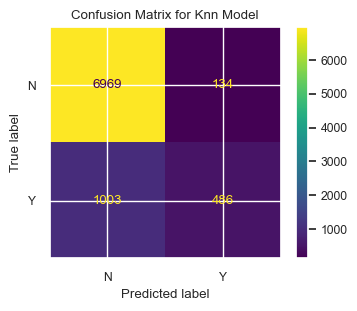

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4,3), dpi=100)
from sklearn import metrics
cnf_matrix_knn = metrics.confusion_matrix(y_test1a, y_pred6)
display = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_knn, display_labels=knn6.classes_)
ax.set(title='Confusion Matrix for Knn Model')
display.plot(ax=ax);

In [72]:
import numpy as np
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train1aT,y_train1a)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.8204123921732596


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

In [73]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train1aT,y_train1a)
print("score",logreg2.score(X_test1aT,y_test1a))

score 0.8254189944134078
